### Lab 14: Machine Learning Hands-on Lab


#### 5. Import Libraries

In [1]:
#this python 3 environment comes with many helpful analytics libraries installed
#import libraries

import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt

#statistical data visualization
import seaborn as sns

%matplotlib inline

#input data files are available in the "../it 166/" directory
#the input directory

import os
os.getcwd()



'C:\\Users\\Sir Wallter\\Documents\\School\\ISU\\Fall2021\\IT166.python'

In [2]:
import warnings

warnings.filterwarnings('ignore')

#### 6.Import datasheet

In [3]:
df=pd.read_csv('weather-aus.csv')
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### 7.Exploratory data analysis

Now I will explore the data to gain insights about the data

In [4]:
#view dimensions of dataset
df.shape

(145460, 23)

We can see that there are 142193 instances and 24 vriables in the data set

In [5]:
col_names=df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#### Drop RISK_MM variable

It is given in the dataset description, that we should drop the RISK_MM feature variable from the dataset descriprtion. So, we should drop it as follows-

In [6]:
#df.drop(['column_name'],axis=1,inplace=True)

In [7]:
#view summary of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
df=df.drop_duplicates()

In [9]:
df=df.dropna()

In [10]:
df.shape

(56420, 23)

#### Types of variables

In this section, I segregate the dataset into categoriacal and numerical values. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have sata type object. Numerical varibel have data type float64.

First of all, I will find categorical variables.

In [11]:
# find categorical variables

categorical=[var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
#view the categorical variables
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,SSW,ENE,SW,No,No
6050,2009-01-02,Cobar,S,SSE,SSE,No,No
6052,2009-01-04,Cobar,NNE,NNE,NNW,No,No
6053,2009-01-05,Cobar,WNW,WNW,WSW,No,No
6054,2009-01-06,Cobar,WNW,NW,WNW,No,No


#### Summary of categorical variables

There is a date variable. It is denoted by Date column

There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm,RainToday and RainTomorrow.

There are two binary categorical variables- RainToday and RainTomorrow.

RainTomorrow is the target variable.

#### Explore problems within categorical variables
First, I will explore the categorical variables.

#### Missing values in categorical variables

In [13]:
#check missing values in categorical variables

df[categorical].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [14]:
#print ctegorical variables containing the missing values

cat1=[var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

Series([], dtype: float64)


We can see that there are only 4 categorical variables in the dataset which contains missing values. There are WindGustDir,WindDir9am and RainToday.

#### Frequency Count of categorical data

Now I will check the frequency counts of categorical variables.

In [15]:
#view frequency of categorical variables

for var in categorical:
    print(df[var].value_counts())

2009-01-19    25
2009-04-17    25
2010-10-22    25
2010-06-09    25
2009-03-28    25
              ..
2008-02-03     1
2008-06-08     1
2008-01-24     1
2008-02-16     1
2008-05-20     1
Name: Date, Length: 3416, dtype: int64
Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64
E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791

In [16]:
#view frequency distribution of categorical variables

for var in categorical:
    print(df[var].value_counts()/float(len(df)))

2009-01-19    0.000443
2009-04-17    0.000443
2010-10-22    0.000443
2010-06-09    0.000443
2009-03-28    0.000443
                ...   
2008-02-03    0.000018
2008-06-08    0.000018
2008-01-24    0.000018
2008-02-16    0.000018
2008-05-20    0.000018
Name: Date, Length: 3416, dtype: float64
Darwin              0.054272
Perth               0.053616
Brisbane            0.052340
MelbourneAirport    0.051914
PerthAirport        0.051631
SydneyAirport       0.050868
Watsonia            0.048387
Mildura             0.045977
MountGambier        0.043690
NorfolkIsland       0.043672
Cairns              0.043318
Townsville          0.042875
WaggaWagga          0.042822
AliceSprings        0.039401
Nuriootpa           0.035590
Hobart              0.034367
Moree               0.033906
Melbourne           0.033641
Portland            0.033020
Woomera             0.030734
Sydney              0.029954
Sale                0.029741
CoffsHarbour        0.024459
Williamtown         0.021234
Canberra  

#### Number of labels: cardinality

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [17]:
# check for cardinality in categorical variables

for var in categorical:
    print(var,'contains',len(df[var].unique()),'labels')

Date contains 3416 labels
Location contains 26 labels
WindGustDir contains 16 labels
WindDir9am contains 16 labels
WindDir3pm contains 16 labels
RainToday contains 2 labels
RainTomorrow contains 2 labels


We can see the there is a Date variable which needs to be preprocessed. I will do preprocessing in the foloowing section.

All the other variables contain relativley smaller number of variables.

#### Feature Engineering of Date variable

In [18]:
df['Date'].dtypes

dtype('O')

We can see that the data type of Date variable is object. I will parse the date currently coded as object into datetime format.

In [19]:
#parse the dates, currently coded as strings into datetime format
df['Date']=pd.to_datetime(df['Date'])

In [20]:
#exrtact the year from date

df['Year']=df['Date'].dt.year

df['Year'].head()

6049    2009
6050    2009
6052    2009
6053    2009
6054    2009
Name: Year, dtype: int64

In [21]:
#extract month from date

df['Month']=df['Date'].dt.month

df['Month'].head()

6049    1
6050    1
6052    1
6053    1
6054    1
Name: Month, dtype: int64

In [22]:
#extract day from date

df['Day']=df['Date'].dt.day

df['Day'].head()

6049    1
6050    2
6052    4
6053    5
6054    6
Name: Day, dtype: int64

In [23]:
#again, view the summmart of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           56420 non-null  datetime64[ns]
 1   Location       56420 non-null  object        
 2   MinTemp        56420 non-null  float64       
 3   MaxTemp        56420 non-null  float64       
 4   Rainfall       56420 non-null  float64       
 5   Evaporation    56420 non-null  float64       
 6   Sunshine       56420 non-null  float64       
 7   WindGustDir    56420 non-null  object        
 8   WindGustSpeed  56420 non-null  float64       
 9   WindDir9am     56420 non-null  object        
 10  WindDir3pm     56420 non-null  object        
 11  WindSpeed9am   56420 non-null  float64       
 12  WindSpeed3pm   56420 non-null  float64       
 13  Humidity9am    56420 non-null  float64       
 14  Humidity3pm    56420 non-null  float64       
 15  Pressure9am    

We can see that there are three additional columns created from Date variable. Now, I will drop the original Date variable from the dataset.

In [24]:
#drop the original date variable

df.drop('Date',axis=1,inplace=True)

#preview the dataset again
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1,2
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1,4
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1,5
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1007.4,1.0,6.0,33.6,37.6,No,No,2009,1,6


Now, we can see that the Date variable has been removed from the dataset.

#### Explor Categorical Variables

Now, I will explore the categorical variables one by one.

In [25]:
#find categorical variables

categorical=[var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :',categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


We can see that there are 6 categorical variables in the dataset. The Date variable has been removed. First, I will check missing values in categorical variables.

In [26]:
#check for missing values in categorical variables

df[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

We can see that WindGustDir,WindDir9am,WindDir3pm,RainToday variables contain missing values. I will explore these variables one by one.

#### Explore Location variable

In [27]:
#print number of labels in Location variable

print('Location contains',len(df.Location.unique()),'lables')

Location contains 26 lables


In [28]:
#check labels in location variable

df.Location.unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

In [29]:
#check frequency distribution of value in location variable
df.Location.value_counts()

Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64

In [30]:
#let's do One Hot Encoding of location variable get k-1 dummy variables after
#One Hot Encoding preview the dataset with head() method

pd.get_dummies(df.Location,drop_first=True).head()

,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Darwin,Hobart,Melbourne,MelbourneAirport,Mildura,...,PerthAirport,Portland,Sale,Sydney,SydneyAirport,Townsville,WaggaWagga,Watsonia,Williamtown,Woomera
6049,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6050,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6052,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6053,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6054,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Explore WindGustDir variable

In [31]:
#print number of labels in WindGustDir variable

print('WindGustDir contains',len(df['WindGustDir'].unique()),'labels')

WindGustDir contains 16 labels


In [32]:
#check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['SSW', 'S', 'NNE', 'WNW', 'N', 'SE', 'ENE', 'NE', 'E', 'SW', 'W',
       'WSW', 'NNW', 'ESE', 'SSE', 'NW'], dtype=object)

In [33]:
#Check frequency distribution of values in WindDustDir variable

df.WindGustDir.value_counts()

E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791
S      3636
ESE    3312
SSE    3295
NE     3185
WNW    2989
NW     2612
NNE    2516
NNW    2289
Name: WindGustDir, dtype: int64

In [34]:
#let's do One Hot Encoding of WindGustDir variable get k-1 dummy variables after
#One Hot Encoding also add an additional dummy variable to indicate there was missing
#data preview the dataset with head() methof
pd.get_dummies(df.WindGustDir,drop_first=True,dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
6049,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6050,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6052,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6053,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6054,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
#sum the number of 1s per boolean variable over the rows of the dataset
#it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir,drop_first=True,dummy_na=True).sum(axis=0)

ENE    4028
ESE    3312
N      4210
NE     3185
NNE    2516
NNW    2289
NW     2612
S      3636
SE     3930
SSE    3295
SSW    3898
SW     4052
W      4161
WNW    2989
WSW    3791
NaN       0
dtype: int64

We can see that there are 9330 missing values in WindGustDir variable.

#### Explore WindDir9am variable

In [36]:
#print number of labels in WindGustDir variable

print('WindDir9am contains',len(df['WindDir9am'].unique()),'labels')

WindDir9am contains 16 labels


In [37]:
#check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['ENE', 'SSE', 'NNE', 'WNW', 'NW', 'N', 'S', 'SE', 'NE', 'W', 'SSW',
       'E', 'NNW', 'ESE', 'WSW', 'SW'], dtype=object)

In [38]:
#check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

N      4967
E      4456
ENE    3932
SSE    3893
SE     3880
W      3707
S      3421
ESE    3400
NE     3390
SW     3356
NNE    3267
WSW    3037
NNW    3016
SSW    2926
WNW    2918
NW     2854
Name: WindDir9am, dtype: int64

In [39]:
#Let's do One Hot Encoding of WindDir9am variable. get k-1 dummy variables
#after One Hot Encoding also add an additional dummy variable to indicate there
#was a missing data preview the dataset with head() method

pd.get_dummies(df.WindDir9am,drop_first=True,dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
6049,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6050,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6052,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6053,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6054,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [40]:
#sum the number of 1s per boolean variable over the rows of the dataset
#it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am,drop_first=True,dummy_na=True).sum(axis=0)

ENE    3932
ESE    3400
N      4967
NE     3390
NNE    3267
NNW    3016
NW     2854
S      3421
SE     3880
SSE    3893
SSW    2926
SW     3356
W      3707
WNW    2918
WSW    3037
NaN       0
dtype: int64

we can see that there are 10013 missing values in the WindDir9am variable.

#### Explore WindDir3pm variable

In [41]:
#print number of labels in WindDir3pm variable

print('WindDir3pm contains',len(df['WindDir3pm'].unique()),'labels')

WindDir3pm contains 16 labels


In [42]:
#check labels in WindDir3pm variable
df['WindDir3pm'].unique()

array(['SW', 'SSE', 'NNW', 'WSW', 'WNW', 'S', 'ENE', 'N', 'SE', 'NNE',
       'NW', 'E', 'ESE', 'NE', 'SSW', 'W'], dtype=object)

In [43]:
#check frequency distribution of values in WIndDir3pm variable
df['WindDir3pm'].value_counts()

SE     4153
S      4109
SW     4012
ENE    3946
W      3922
WSW    3856
E      3753
ESE    3703
N      3626
SSW    3485
NE     3390
SSE    3332
WNW    3200
NNW    2766
NW     2727
NNE    2440
Name: WindDir3pm, dtype: int64

In [44]:
#lets do One HOt Encoding of WindDir3pm variable get k-1 dummer variables after
#One Hot Encoding also add an additional dummy variable to indicate there was 
#missing data preview the dataset with head() method

pd.get_dummies(df.WindDir3pm,drop_first=True,dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
6049,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6050,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6052,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6053,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6054,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
#sum the number of 1s per boolean variable over the rows of the dataset it will
#tell us how many obeservations we have for each category

pd.get_dummies(df.WindDir3pm,drop_first=True,dummy_na=True).sum(axis=0)

ENE    3946
ESE    3703
N      3626
NE     3390
NNE    2440
NNW    2766
NW     2727
S      4109
SE     4153
SSE    3332
SSW    3485
SW     4012
W      3922
WNW    3200
WSW    3856
NaN       0
dtype: int64

There are 3778 missing values in the WindDir3pm variable.

### Explore RainToday variable

In [46]:
#print number of labels in RainToday variable

print('RainToday contains',len(df['RainToday'].unique()),'Labels')

RainToday contains 2 Labels


In [47]:
#Check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
#check frequency distributions of values in WindGustDir variable

df.RainToday.value_counts()

No     43958
Yes    12462
Name: RainToday, dtype: int64

In [49]:
#lets do One HOt Encoding of RainToday variable get k-1 dummer variables after
#One Hot Encoding also add an additional dummy variable to indicate there was 
#missing data preview the dataset with head() method

pd.get_dummies(df.RainToday,drop_first=True,dummy_na=True).head()

,Yes,NaN
6049,0,0
6050,0,0
6052,0,0
6053,0,0
6054,0,0


In [50]:
#sum the number of 1s per boolean variable over the rows of the dataset it will
#tell us how many obeservations we have for each category

pd.get_dummies(df.RainToday,drop_first=True,dummy_na=True).sum(axis=0)

Yes    12462
NaN        0
dtype: int64

There are 1406 missing values in the RainToday variable.

#### Explore Numerical variables

In [51]:
#find numerical variables

numerical=[var for var in df.columns if df[var].dtype!='O']

print('There are {} numberical variables\n'.format(len(numerical)))

print('The numerical variables are :',numerical)

There are 19 numberical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [52]:
#view the numreical variable

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,2009,1,1
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,2009,1,2
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,2009,1,4
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,2009,1,5
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,2009,1,6


### Explore problems within numerical variables

In [53]:
#check mmissing values in numerical ariables
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

We can see that all the 16 numerical variables conatins missing values.

#### Outliers in numerical variables

In [54]:
#view summary statistics in numerical variables
print(round(df[numerical].describe()),2)

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  56420.0  56420.0   56420.0      56420.0   56420.0        56420.0   
mean      13.0     24.0       2.0          6.0       8.0           41.0   
std        6.0      7.0       7.0          4.0       4.0           13.0   
min       -7.0      4.0       0.0          0.0       0.0            9.0   
25%        9.0     19.0       0.0          3.0       5.0           31.0   
50%       13.0     24.0       0.0          5.0       9.0           39.0   
75%       18.0     30.0       1.0          7.0      11.0           48.0   
max       31.0     48.0     206.0         81.0      14.0          124.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count       56420.0       56420.0      56420.0      56420.0      56420.0   
mean           16.0          20.0         66.0         50.0       1017.0   
std             8.0           9.0         19.0         20.0          7.0   
min             2.0 

On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers

I will draw a boxplot to visualize outliers in the above variables.

Text(0, 0.5, 'WindSpeed3pm')

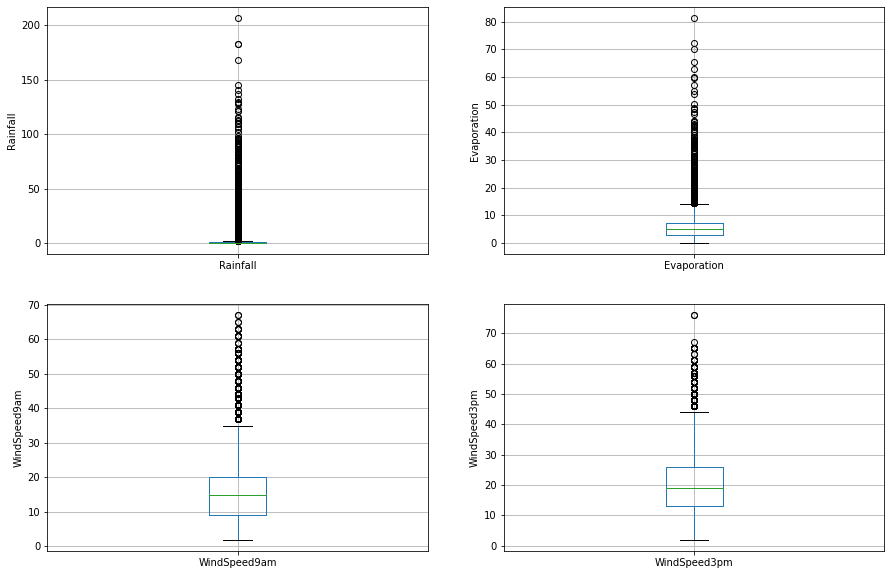

In [55]:
#draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig=df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2,2,2)
fig=df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2,2,3)
fig=df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2,2,4)
fig=df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')


### Check the Distribution of variables

Text(0, 0.5, 'RainTomorrow')

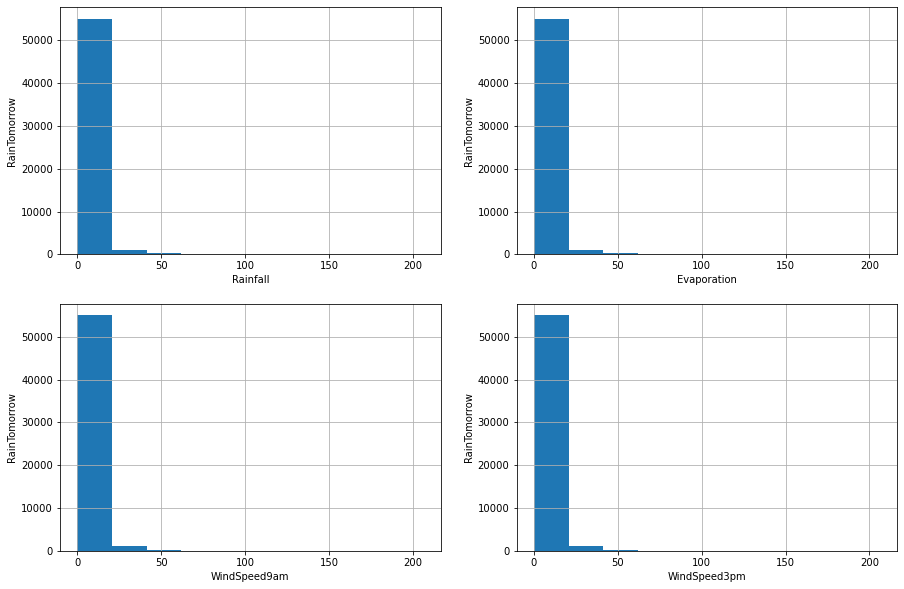

In [56]:
#plot histogram to check distributions

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig=df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,2)
fig=df.Rainfall.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,3)
fig=df.Rainfall.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,4)
fig=df.Rainfall.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [57]:
#find outliers for Rainfall variable

IQR= df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
Lower_fence=df.Rainfall.quantile(0.25)-(IQR*3)
Upper_fence=df.Rainfall.quantile(0.75)+(IQR*3)
print('Rainfall outliers are values< {lowerboundary} or > {upperboundary}\n'
     .format(lowerboundary=Lower_fence,upperboundary=Upper_fence))

Rainfall outliers are values< -1.7999999999999998 or > 2.4



For Rainfall, the minimum and maximum values are 0.0 and 371.0 So, the outliers are values>3.2

In [58]:
#find outliers for Evaporation variable

IQR= df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
Lower_fence=df.Evaporation.quantile(0.25)-(IQR*3)
Upper_fence=df.Evaporation.quantile(0.75)+(IQR*3)
print('Evaporation outliers are values< {lowerboundary} or > {upperboundary}\n'
     .format(lowerboundary=Lower_fence,upperboundary=Upper_fence))

Evaporation outliers are values< -11.0 or > 21.200000000000003



For Evaporation, the minimum and maximum vaues are 0.0 and 145.0 So, the outliers are values>21.8

In [59]:
#find outliers for WindSpeed9am variable


IQR= df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
Lower_fence=df.WindSpeed9am.quantile(0.25)-(IQR*3)
Upper_fence=df.WindSpeed9am.quantile(0.75)+(IQR*3)
print('WindSpeed9am outliers are values< {lowerboundary} or > {upperboundary}\n'
     .format(lowerboundary=Lower_fence,upperboundary=Upper_fence))

WindSpeed9am outliers are values< -24.0 or > 53.0



for WindSpede9am, the minimum and maximum values are 0.0 and 87.0, So, the outliers are values>57.0

#### Delcare Feature vector and target variable

In [60]:
X=df.drop(['RainTomorrow'],axis=1)

y=df['RainTomorrow']

#### Split data into separate training and test set

In [61]:
#split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [62]:
#check the shape of X_train and X_test

X_train.shape,X_test.shape

((45136, 24), (11284, 24))

#### Feature Engineering

In [63]:
#check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [64]:
#display categorical variables

categorical=[col for col in X_train.columns if X_train[col].dtypes=='O']
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [65]:
#display numerical variables

numerical=[col for col in X_train.columns if X_train[col].dtypes!='O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

#### Engineering missing values in numerical variables

In [66]:
#check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [67]:
#check missibg values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [68]:
#print pecentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col,round(X_train[col].isnull().mean(),4))

### Assumption

I assume that the data are missing completely at random (MCAR).There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.


I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only.This is to avoid overfitting.

In [69]:
#impute missing values in X_train and X_test with respective column median in 
#X_train

for df1 in [X_train,X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median,inplace=True)

In [70]:
#check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [71]:
#check mising values in numerical variables in X_test
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Now we can see that there are no missing values in the numerical columns of training and test set.

#### Engineering missing values in categorical variables

In [72]:
#print pecentage of missing vlaues in the categorical variables in training set

X_train[categorical].isnull().mean()

Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
dtype: float64

In [73]:
#print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col,(X_train[col].isnull().mean()))

In [74]:
#impute missing categorical variables with most frequent values

for df2 in [X_train,X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0],inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0],inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0],inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0],inplace=True)

In [75]:
#check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [76]:
#Check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

As a final check, I will check for missing values in X_train and X_test

In [77]:
#check missing values in X_train

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [78]:
#check missing values in X_test

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

We can see that there are no missing values in X_train and X_test

#### Engineering outliers in numerical variables

We have seen that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [79]:
def max_value(df3,variable,top):
    return np.where(df3[variable]>top,top,df3[variable])

for df3 in [X_train,X_test]:
    df3['Rainfall']=max_value(df3, 'Rainfall',3.2)
    df3['Evaporation']=max_value(df3, 'Evaporation',21.8)
    df3['WindSpeed9am']=max_value(df3, 'WindSpeed9am',55)
    df3['WindSpeed3pm']=max_value(df3, 'WindSpeed3pm',57)

In [80]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [81]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [82]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [83]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [84]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000
mean,13.460666,24.207005,0.671830,5.469242,7.729458,40.886255,15.679170,19.800315,65.894364,49.626817,1017.255780,1014.810008,4.238191,4.320188,18.198755,22.699118,2012.222948,6.420042,15.754475
std,6.411206,6.976391,1.179652,3.508103,3.756245,13.359252,8.303351,8.508927,18.529637,20.192611,6.907346,6.871586,2.799524,2.648562,6.572731,6.840171,2.449089,3.444068,8.774371
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,2007.000000,1.000000,1.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,36.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.300000,2010.000000,3.000000,8.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,2012.000000,6.000000,16.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,2014.000000,9.000000,23.000000
max,30.500000,47.300000,3.200000,21.800000,14.500000,124.000000,55.000000,57.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,8.000000,39.400000,46.100000,2017.000000,12.000000,31.000000


#### Encode categorical variables

In [85]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [86]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
40249,Williamtown,SSW,S,SSE,No
23214,NorfolkIsland,ENE,E,E,No
106053,Woomera,S,ENE,WSW,No
36089,SydneyAirport,SSW,SE,S,Yes
22756,NorfolkIsland,SSE,ESE,SE,No


In [87]:
#encode RainToday variable

import category_encoders as ce

encoder=ce.BinaryEncoder(cols=["RainToday"])

X_train=encoder.fit_transform(X_train)

X_test=encoder.transform(X_test)

In [88]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
40249,Williamtown,17.5,26.2,0.0,12.0,13.0,SSW,39.0,S,SSE,...,1012.5,2.0,1.0,23.4,24.5,0,1,2010,12,13
23214,NorfolkIsland,20.6,25.2,0.0,6.0,11.2,ENE,50.0,E,E,...,1015.9,5.0,6.0,23.4,23.8,0,1,2014,12,25
106053,Woomera,9.4,22.0,0.0,3.2,10.6,S,28.0,ENE,WSW,...,1022.5,1.0,1.0,15.9,21.7,0,1,2010,5,7
36089,SydneyAirport,17.8,21.5,3.2,5.6,5.7,SSW,41.0,SE,S,...,1021.8,7.0,5.0,20.0,20.1,1,0,2016,4,12
22756,NorfolkIsland,14.7,18.7,0.0,4.2,0.0,SSE,50.0,ESE,SE,...,1011.5,7.0,8.0,17.8,17.1,0,1,2013,9,23


We can see that two additional variables RainToday_0 and RainToday_1 are created from RainToday variable.

Now, I will create the X_train training set.

In [89]:
X_train=pd.concat([X_train[numerical],X_train[['RainToday_0','RainToday_1']],
                   
                   pd.get_dummies(X_train.Location),
                   pd.get_dummies(X_train.WindGustDir),
                   pd.get_dummies(X_train.WindDir9am),
                   pd.get_dummies(X_train.WindDir3pm)],axis=1)

In [90]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
40249,17.5,26.2,0.0,12.0,13.0,39.0,30.0,28.0,65.0,61.0,...,0,0,0,0,1,0,0,0,0,0
23214,20.6,25.2,0.0,6.0,11.2,50.0,26.0,33.0,76.0,72.0,...,0,0,0,0,0,0,0,0,0,0
106053,9.4,22.0,0.0,3.2,10.6,28.0,4.0,7.0,55.0,36.0,...,0,0,0,0,0,0,0,0,0,1
36089,17.8,21.5,3.2,5.6,5.7,41.0,19.0,28.0,72.0,71.0,...,0,0,1,0,0,0,0,0,0,0
22756,14.7,18.7,0.0,4.2,0.0,50.0,22.0,24.0,77.0,76.0,...,0,0,0,1,0,0,0,0,0,0


similarly, I will create the X_test testing set.

In [91]:
X_test=pd.concat([X_test[numerical],X_test[['RainToday_0','RainToday_1']],
                   
                   pd.get_dummies(X_test.Location),
                   pd.get_dummies(X_test.WindGustDir),
                   pd.get_dummies(X_test.WindDir9am),
                   pd.get_dummies(X_test.WindDir3pm)],axis=1)

In [92]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
103197,0.6,16.0,0.0,5.8,10.0,35.0,19.0,20.0,55.0,41.0,...,0,0,0,0,0,0,0,0,0,1
33303,19.7,28.4,0.0,7.4,6.0,35.0,11.0,17.0,67.0,64.0,...,0,0,0,0,0,0,0,0,0,0
136838,23.3,38.5,3.2,10.4,10.0,57.0,24.0,9.0,46.0,27.0,...,0,0,0,1,0,0,0,0,0,0
80964,10.8,19.7,0.0,5.2,4.8,35.0,11.0,13.0,72.0,56.0,...,0,0,0,0,0,0,0,0,0,0
34347,8.9,21.8,0.0,1.6,10.1,37.0,13.0,7.0,61.0,30.0,...,1,0,0,0,0,0,0,0,0,0


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.

#### 11. Feature Scaling

In [93]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,...,45136.000000,45136.000000,45136.000000,45136.000000,45136.00000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000
mean,13.460666,24.207005,0.671830,5.469242,7.729458,40.886255,15.679170,19.800315,65.894364,49.626817,...,0.048875,0.047567,0.072581,0.074708,0.05849,0.060971,0.071008,0.070498,0.056673,0.068748
std,6.411206,6.976391,1.179652,3.508103,3.756245,13.359252,8.303351,8.508927,18.529637,20.192611,...,0.215608,0.212851,0.259450,0.262922,0.23467,0.239280,0.256840,0.255987,0.231220,0.253028
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,36.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.500000,47.300000,3.200000,21.800000,14.500000,124.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
cols=X_train.columns

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [96]:
X_train=pd.DataFrame(X_train,columns=[cols])

In [97]:
X_test=pd.DataFrame(X_test,columns=[cols])

In [98]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,...,45136.000000,45136.000000,45136.000000,45136.000000,45136.00000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000
mean,0.541953,0.465440,0.209947,0.250883,0.533066,0.277272,0.258098,0.323642,0.658944,0.496268,...,0.048875,0.047567,0.072581,0.074708,0.05849,0.060971,0.071008,0.070498,0.056673,0.068748
std,0.172344,0.161491,0.368641,0.160922,0.259051,0.116167,0.156667,0.154708,0.185296,0.201926,...,0.215608,0.212851,0.259450,0.262922,0.23467,0.239280,0.256840,0.255987,0.231220,0.253028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.411290,0.337963,0.000000,0.128440,0.344828,0.191304,0.132075,0.200000,0.550000,0.360000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.534946,0.458333,0.000000,0.229358,0.593103,0.260870,0.245283,0.309091,0.670000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.674731,0.592593,0.187500,0.339450,0.737931,0.339130,0.339623,0.436364,0.790000,0.630000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


We now have X_train dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

#### 12. Model Training

In [99]:
#train a logistic regression model on the traing set
from sklearn.linear_model import LogisticRegression

#instantiate the model
logreg=LogisticRegression(solver='liblinear',random_state=0)

#fit the model
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

#### 13. Predict results

In [100]:
y_pred_test=logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

#### predict_proba method
#### predict_proba method
gives the probabilities for the target variable (0 and 1) in this case, in array form.
0 is for probability of no rain and 1 is for prabability of rain.

In [101]:
#probability of getting output as 0-no rain
logreg.predict_proba(X_test)[:,0]

array([0.98963125, 0.72433849, 0.59150832, ..., 0.9808218 , 0.81433698,
       0.65234403])

In [102]:
#probability of getting output as 1-rain

logreg.predict_proba(X_test)[:,1]

array([0.01036875, 0.27566151, 0.40849168, ..., 0.0191782 , 0.18566302,
       0.34765597])

#### 14. Check accuracy score

In [103]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8610


#### Check for overfitting and underfitting

In [104]:
#print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg.score(X_train,y_train)))

print('Test set score: {:.4}'.format(logreg.score(X_test,y_test)))

Training set score: 0.8565
Test set score: 0.861


The training-set accuracy score is 0.8476 while the test-set accuracy to be 0.8501. These two values are quite comparable. So, there is no question of overfitting.

In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

I will increase C and fit a more flexible model.

In [105]:
#fit the Logistics Regression model with C=100

#instantiate the model
logreg100=LogisticRegression(C=100,solver='liblinear',random_state=0)

#fit the model
logreg100.fit(X_train,y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [106]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train,y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test,y_test)))

Training set score: 0.8566
Test set score: 0.8622


We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [107]:
#fir the logistic regression mmoel with C=001

#instantiate the model
logreg001=LogisticRegression(C=0.01,solver='liblinear',random_state=0)

#fit the model
logreg001.fit(X_train,y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [108]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train,y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test,y_test)))

Training set score: 0.8459
Test set score: 0.8520


So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relatiev to the default parameters.

#### Compare model accuracy with null accuracy

So, the model accuracy is 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [109]:
#check class distribution in test set

y_test.value_counts()

No     8854
Yes    2430
Name: RainTomorrow, dtype: int64

We can see that the occurences of most frequent class is 22067. So, we can calculate null accuracy by dividing 22067 by total number of occurences.


In [110]:
#check null accuracy score

null_accuracy=(22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.7759


We can see that our model accuracy score is 0.8501 but null accuracy score is 0.7759. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue

#### 15. Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below

In [111]:
#print the confusion matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_test)

print('Confusion matrix\n\n',cm)

print('\nTrue Positives(TP)=',cm[0,0])

print('\nTrue Negatives(TN)=',cm[1,1])

print('\nFalse Positives(FP)=',cm[0,1])

print('\nFalse Negatives(FN)=',cm[1,0])

Confusion matrix

 [[8335  519]
 [1050 1380]]

True Positives(TP)= 8335

True Negatives(TN)= 1380

False Positives(FP)= 519

False Negatives(FN)= 1050


The confusion matrix shows 20892 + 3285 = 24177 correct predictions and 3087 + 1175 = 4262 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 20892
True Negatives (Actual Negative:0 and Predict Negative:0) - 3285
False Positives (Actual Negative:0 but Predict Positive:1) - 1175 (Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 3087 (Type II error)

<AxesSubplot:>

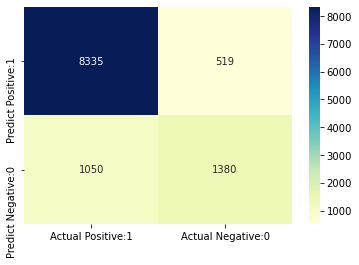

In [112]:
#visualize confusion matrix with seaborn heatmap

cm_matrix=pd.DataFrame(data=cm,columns=['Actual Positive:1','Actual Negative:0'],
                      index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm_matrix,annot=True,fmt='d',cmap='YlGnBu')

#### 16. Classification metrics

Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

          No       0.89      0.94      0.91      8854
         Yes       0.73      0.57      0.64      2430

    accuracy                           0.86     11284
   macro avg       0.81      0.75      0.78     11284
weighted avg       0.85      0.86      0.85     11284



#### classification accuracy

In [114]:
TP=cm[0,0]
TN=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

In [115]:
#print classification accuracy

classification_accuracy=(TP+TN)/float(TP+TN+FP+FN)

print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Classification accuracy: 0.8610


#### Classification error

In [116]:
#print classification error

classification_error=(FP+FN)/float(TP+TN+FP+FN)

print('Classification error: {0:0.4f}'.format(classification_error))

Classification error: 0.1390


#### Precision

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [117]:
#print precision score

precision=TP/float(TP+FP)

print('Precision: {0:0.4}f'.format(precision))

Precision: 0.9414f


#### Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [118]:
recall=TP/float(TP+FN)

print('Recall or Sensitivity:{0:0.4f}'.format(recall))

Recall or Sensitivity:0.8881


#### True Positive Rate

synonymous with Recall

In [119]:
true_positive_rate=TP/float(TP+FN)

print('True Positive Rate; {0:0.4f}'.format(true_positive_rate))

True Positive Rate; 0.8881


#### Specificity

In [120]:
specificity=TN/(TN+FP)

print("Specificity:{0:0.4f}".format(specificity))

Specificity:0.7267


#### F1-score

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

#### Support

Support is the actual number of occurrences of the class in our dataset.

### 17. Adjusting the threshold level

In [121]:
#print the first 10 predicted probabilities of two classes 
#s-0 and 1
y_pred_prob=logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.98963125, 0.01036875],
       [0.72433849, 0.27566151],
       [0.59150832, 0.40849168],
       [0.82125108, 0.17874892],
       [0.95108819, 0.04891181],
       [0.98018304, 0.01981696],
       [0.68275308, 0.31724692],
       [0.96789667, 0.03210333],
       [0.98651794, 0.01348206],
       [0.9474213 , 0.0525787 ]])

Observations
In each row, the numbers sum to 1.
There are 2 columns which correspond to 2 classes - 0 and 1.

Class 0 - predicted probability that there is no rain tomorrow.

Class 1 - predicted probability that there is rain tomorrow.

Importance of predicted probabilities

We can rank the observations by probability of rain or no rain.
predict_proba process

Predicts the probabilities

Choose the class with the highest probability

Classification threshold level

There is a classification threshold level of 0.5.

Class 1 - probability of rain is predicted if probability > 0.5.

Class 0 - probability of no rain is predicted if probability < 0.5.

In [122]:
#store the probabilities in dataframe

y_pred_prob_df=pd.DataFrame(data=y_pred_prob,columns=['Prob\n'
'of-No rain tomorrow (0)','Prob of= Rain tomorrow (1)'])

y_pred_prob_df

,Prob\nof-No rain tomorrow (0),Prob of= Rain tomorrow (1)
0,0.989631,0.010369
1,0.724338,0.275662
2,0.591508,0.408492
3,0.821251,0.178749
4,0.951088,0.048912
5,0.980183,0.019817
6,0.682753,0.317247
7,0.967897,0.032103
8,0.986518,0.013482
9,0.947421,0.052579


In [123]:
#print the first 10 predicted probabilities for class 1
#probability of rain

logreg.predict_proba(X_test)[0:10,1]

array([0.01036875, 0.27566151, 0.40849168, 0.17874892, 0.04891181,
       0.01981696, 0.31724692, 0.03210333, 0.01348206, 0.0525787 ])

In [124]:
#store the predicated probabilities for class 1-
#probability of rain

y_pred1=logreg.predict_proba(X_test)[:,1]

Text(0, 0.5, 'Frequency')

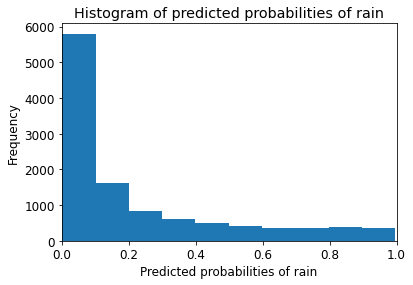

In [125]:
#plot histogram of predicted probabilities


#adjust the font size 
plt.rcParams['font.size'] = 12


#plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


#set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


#set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

Observations
We can see that the above histogram is highly positive skewed.
The first column tell us that there are approximately 15000 observations with probability between 0.0 and 0.1.
There are small number of observations with probability > 0.5.
So, these small number of observations predict that there will be rain tomorrow.
Majority of observations predict that there will be no rain tomorrow.

#### Lower the threshold

In [126]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    cm1=0
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1, i/10)
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    cm1 = confusion_matrix(y_test, y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[5628 3226]
 [ 151 2279]] 

 with 7907 correct predictions,  

 3226 Type I errors( False Positives),  

 151 Type II errors( False Negatives),  

 Accuracy score:  0.7007266926621766 

 Sensitivity:  0.9378600823045268 

 Specificity:  0.6356449062570589 



With 0.2 threshold the Confusion Matrix is  

 [[7005 1849]
 [ 424 2006]] 

 with 9011 correct predictions,  

 1849 Type I errors( False Positives),  

 424 Type II errors( False Negatives),  

 Accuracy score:  0.7985643388869196 

 Sensitivity:  0.8255144032921811 

 Specificity:  0.7911678337474588 



With 0.3 threshold the Confusion Matrix is  

 [[7635 1219]
 [ 630 1800]] 

 with 9435 correct predictions,  

 1219 Type I errors( False Positives),  

 630 Type II errors( False Negatives),  

 Accuracy score:  0.8361396667848281 

 Sensitivity:  0.7407407407407407 

 Specificity:  0.862322114298622 



With 0.4 threshold the Confusion Matrix is  

 [[8039  815]
 [ 842 1588]] 

 

Comments
In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.
Threshold can be adjusted to increase sensitivity or specificity.
Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.
We can see that increasing the threshold level results in increased accuracy.
Adjusting the threshold level should be one of the last step you do in the model-building process.

##### 18. ROC - AUC

ROC Curve
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

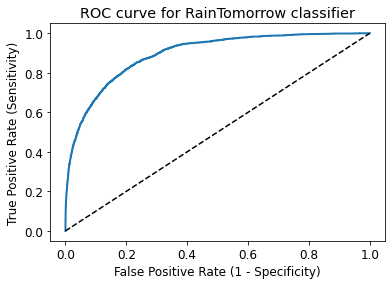

In [127]:
#plot ROC Curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

ROC-AUC
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [128]:
#compute ROC AUC

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8943


Comments
ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [129]:
#calculate cross validated ROC AUC 

from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8878


#### 19. k fold Cross Validation

In [130]:
#applying 5 fold cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.85389898 0.8569846  0.85454747 0.85554448 0.8538828 ]


We can summarize the cross-validation accuracy by calculating its mean

#### 20. Hyperparameter Optimization using GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters=[{'penalty':['l1','l2']},{'C':[1,10,100,1000]}]
grid_search=GridSearchCV(estimator=logreg,param_grid=parameters,scoring='accuracy',cv=5, verbose=0)
grid_search.fit(X_train,y_train)

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

Comments
Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507.
We can see that GridSearch CV improve the performance for this particular model.

#### 21. Results and conclusion

The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

The model shows no signs of overfitting.

Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Increasing the threshold level results in increased accuracy.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced set of features.

In the original model, we have FP = 1175 whereas FP1 = 1174. So, we get approximately same number of false positives. Also, FN = 3087 whereas FN1 = 3091. So, we get slighly higher false negatives.

Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507. We can see that GridSearch CV improve the performance for this particular model.

#### 22. References

The work done in this project is inspired from following books and websites:-

Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

Udemy course – Machine Learning – A Z by Kirill Eremenko and Hadelin de Ponteves

Udemy course – Feature Engineering for Machine Learning by Soledad Galli

Udemy course – Feature Selection for Machine Learning by Soledad Galli

https://en.wikipedia.org/wiki/Logistic_regression

https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

https://en.wikipedia.org/wiki/Sigmoid_function

https://www.statisticssolutions.com/assumptions-of-logistic-regression/

https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python

https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression

https://www.ritchieng.com/machine-learning-evaluate-classification-model/